In [347]:
import pandas as pd
import numpy as np
import umap
import scanpy as sc

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
temp['IL']

In [671]:
data = pd.read_csv('../data/scrnaseq/test_mat.csv', sep=',', header=0, index_col=0)

In [672]:
meta = pd.read_csv('../data/scrnaseq/meta_data_smartseq2.csv', sep=',', header=0, index_col=0)

In [673]:
data = data[meta.index]

In [674]:
fil = meta['nnet2'] != 'HEK cells'
meta = meta[fil]
data = data[data.columns[fil]]

In [675]:
data = data[data.mean(1) != 0]

In [676]:
model = umap.UMAP()

In [677]:
data_umap = model.fit_transform(data.T)

In [678]:
data_umap = pd.DataFrame(data_umap, index=data.columns, columns=['UMAP1', 'UMAP2'])

In [679]:
data_umap = data_umap.loc[meta.index]

In [680]:
data_umap['Cell'] = meta.loc[data_umap.index, 'nnet2']

In [681]:
data_umap.head()

,UMAP1,UMAP2,Cell
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,0.640195,10.832067,NK cells
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,1.517758,11.090412,NK cells
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,5.160016,1.461902,B cells
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,1.210563,11.167472,NK cells
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,0.677516,10.613451,NK cells


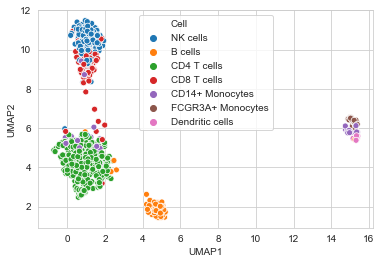

In [682]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Cell'])

In [701]:
data_umap['Expression'] = data.loc['CD']

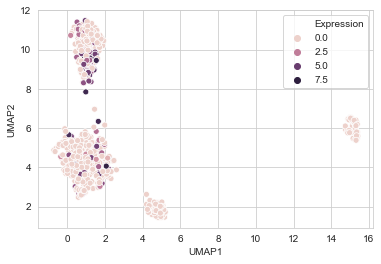

In [702]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])

In [620]:
nn = pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', sep=',', header=0, index_col=0).T

In [658]:
data_norm = ((data - data.min()) / (data.max() - data.min()))
#data_norm = data.copy()

In [622]:
common_genes = list(set(nn.index) & set(data_norm.index))

In [623]:
nn = nn.loc[common_genes]
data_norm = data_norm.loc[common_genes]

In [624]:
data_nn = pd.concat([nn,data_norm], 1)

In [625]:
sim_nn_data = data_nn.corr()

In [626]:
sim_nn_data = sim_nn_data.loc[nn.columns, data_norm.columns]

In [627]:
sim_nn_data = sim_nn_data.T

In [645]:
data_umap['Gene'] = sim_nn_data.loc[data_umap.index, 'IL1A']

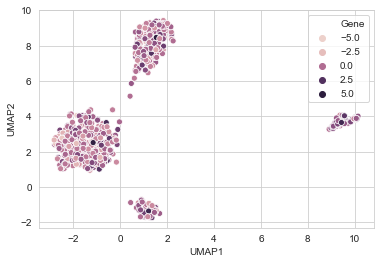

In [646]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Gene'])

In [630]:
sim_nn_data = (sim_nn_data - sim_nn_data.mean()) / sim_nn_data.std()

In [631]:
sim_nn_data = ((sim_nn_data.T - sim_nn_data.mean(1)) / sim_nn_data.std(1)).T

In [632]:
sim_nn_data = sim_nn_data.loc[meta.index]
sim_nn_data['Cell'] = meta.loc[sim_nn_data.index, 'nnet2']

In [633]:
average_activity = sim_nn_data.groupby('Cell').mean()

In [634]:
average_activity.loc['B cells'].sort_values()

APLN       -1.009880
AREG       -0.975270
TNFRSF1B   -0.945499
FGFR2      -0.912525
EDN2       -0.905100
              ...   
SPP1        0.718174
IL22        0.780877
CCL20       0.791530
CXCL1       0.792960
CCL1        0.824187
Name: B cells, Length: 213, dtype: float64

In [650]:
average_activity.loc['CD8 T cells'].sort_values()

BMP10      -0.493000
PDGFC      -0.430223
IL24       -0.429538
CCL22      -0.423469
EDN1       -0.408257
              ...   
GDF7        0.373456
TNFRSF1A    0.379888
IL1B        0.405271
AREG        0.436668
EPO         0.502674
Name: CD8 T cells, Length: 213, dtype: float64

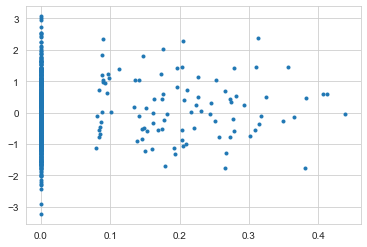

In [670]:
plt.plot(data_norm.loc['TNFRSF1A'], sim_nn_data['TNF'], '.')

In [665]:
data_norm

,SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,SMARTseqFINAL_allLanes_AACATCCGCGGAAGAA,SMARTseqFINAL_allLanes_AACATCCGCGGCATTA,SMARTseqFINAL_allLanes_AACATCCGCTATGTGG,SMARTseqFINAL_allLanes_AACATCCGGAATCCAG,SMARTseqFINAL_allLanes_AACATCCGGAGGAGAA,...,SMARTseqFINAL_allLanes_TTGTCGTGCCACTGAA,SMARTseqFINAL_allLanes_TTGTCGTGCCTGAGAA,SMARTseqFINAL_allLanes_TTGTCGTGCTAAGCAG,SMARTseqFINAL_allLanes_TTGTCGTGGACACCAA,SMARTseqFINAL_allLanes_TTGTCGTGGCGACTAA,SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA,SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA,SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA
TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
DPM1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.251294,...,0.0,0.0,0.000000,0.0,0.290118,0.0,0.0,0.000000,0.0,0.000000
SCYL3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
C1orf112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
FGR,0.0,0.335164,0.295368,0.405617,0.161258,0.350347,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.409691,0.0,0.201116,0.0,0.0,0.000000,0.0,0.273616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIPK3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRAV8-3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.093645,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRAV9-2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRBJ1-4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.173089,0.0,0.000000


In [667]:
data_norm.loc['ERBB2']

SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG    0.000000
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG    0.000000
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA    0.000000
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG    0.225701
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA    0.000000
                                             ...   
SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA    0.000000
Name: ERBB2, Length: 623, dtype: float64